# Übung 6

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden wir intensiv mit Dimensionsreduktion mittels Hauptkomponentenzerlegung (PCA) beschäftigen. Wir werden die PCA implementieren und damit verschiedene Datensätze untersuchen.

### 6.1 Eigengesichter (Bildkompression mittels PCA)

In den 90er Jahren haben Forscher des Olivetti Research Laboratory in Cambridge, basierend auf der PCA, eines der frühen Verfahren für Gesichtserkennung entwickelt. Das Olivetti Research Laboratory wurde wenige Jahre später von AT&T übernommen, und der [Datensatz](https://web.archive.org/web/20051104013331/http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html), auf dem die Arbeiten beruhten, wurde unter dem Namen *Olivetti Faces Dataset* weltweit bekannt.

Wir werden uns in dieser Übung mit dem Aspekt der Dimensionsreduktion mithilfe von PCA beschäftigen, und wie sie zur Datenkompression von Gesichtsbildern eingesetzt werden kann. Die PCA-Richtungen (Hauptkomponenten) eines Datensatzes von Gesichtsbildern werden auch *Eigengesichter* bzw. *Eigenfaces* genannt.

**Ihre Daten**

Die Olivetti Faces bestehen aus 400 Graustufenbildern (64x64 Pixel), die von 40 Personen stammen. Von jeder Person wurden 10 Gesichtsbilder angefertigt, wobei die Personen gebeten wurden, unterschiedliche Gesichtsausdrücke zu zeigen. Gleichzeitig wurde die Beleuchtung während der Fotoaufnahmen variiert.

* Importieren Sie den Datensatz durch das Ausführen der untenstehenden Code-Zelle.

In [1]:
import numpy as np
import seaborn as sbn
import seaborn_image as isbn
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from skimage.exposure import adjust_gamma
from skimage.exposure import rescale_intensity
import pandas as pd


# Import data
data, targets = fetch_olivetti_faces(return_X_y=True)

**Ihre Aufgaben**

* Bei der Implementierung der PCA in den nachfolgenden Teilaufgaben nutzen Sie bitte ausschließlich *Numpy* und keine Funktionen von sklearn.

(1) Untersuchen Sie die Daten in `data`: 

* Nennen Sie die Anzahl der Samples (Gesichter) in diesem Datensatz.
* Nennen Sie die Anzahl der Features (Merkmale, Pixel) jedes Gesichts.
* Prüfen Sie, in welchem Wertebereich die Pixelwerte variieren und nennen Sie den Wertebereich.

In [173]:
print('number of the samples: %d\n'
      'number of the features: %d\n'
      'and their pixel interval: [%f, %f]'
      %(data.shape[0], data.shape[1],data.min(), data.max()))

number of the samples: 400
number of the features: 4096
and their pixel interval: [0.000000, 1.000000]


(2) Nutzen Sie Ihre Erkenntnisse aus (1) und visualisieren Sie das Gesicht 296 (0-basierte Zählung).

* Dabei kann Ihnen [dieser Befehl](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html?highlight=reshape#numpy.ndarray.reshape) und [jener Befehl](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) hilfreich sein. Wenn Sie `cmap=gray` verwenden, dann wird das Gesicht in Graustufen dargestellt.

No. of Obs. : 4096
Min. Value : 0.14049586653709412
Max. Value : 0.7851239442825317
Mean : 0.5198863744735718
Variance : 0.017052635550498962
Skewness : -0.45137323403979573


<AxesSubplot:>

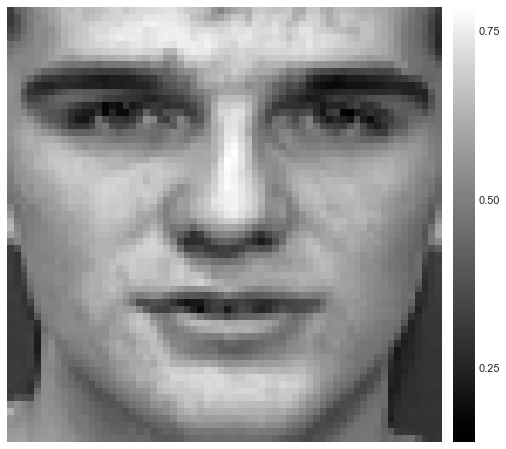

In [174]:
# 4096 = 2^12 = 2^6 *2^6 = 64 * 64
isbn.imgplot(data=data[295].reshape(64,64), gray=True,origin='upper' , describe=True, despine=True)

(3) Visualisieren Sie in einem [3x3 Plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) die Gesichter 291 bis 299.

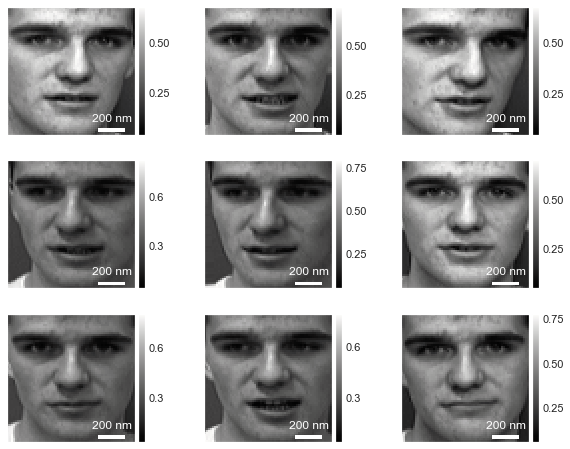

In [175]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
for i in range(9):
      j = int(i/3)
      i %= 3
      isbn.imgplot(data[(3*j + i) + 290 ].reshape(64, 64), ax=axs[j][i], origin='upper', gray=True,
                   map_func=adjust_gamma, gamma= 1.5, dx=15, units='nm', alpha= 0.99)

(4) Nehmen Sie die Folien zur heutigen Vorlesung zur Hand und schlagen Sie nach, wie die PCA definiert ist.

* Überlegen Sie sich die Dimensionen der Kovarianzmatrix des Datensatzes und nennen Sie sie hier.

(5) Bestimmen Sie die [Kovarianzmatrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) `cov_mat` des Datensatzes. Überprüfen Sie, ob die Dimensionen der Kovarianz mit Ihrer Erwartung aus Schritt (4) übereinstimmt.

* Hinweis: Eine typische Fehlerquelle besteht bei diesem Schritt darin, dass die Kovarianzmatrix nicht korrekt berechnet wird. Es ist daher wichtig, dass Sie wissen und überprüfen, ob die Dimensionen der Kovarianzmatrix stimmen.

In [176]:
print(data.shape)

(400, 4096)


In [177]:
cov_mat = np.cov(data, rowvar=False,)
print(cov_mat.shape)

(4096, 4096)


(6) [Bestimmen](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) Sie nun die Eigenwerte `eig_vals` und Eigenvektoren `eig_vecs` Ihrer Kovarianzmatrix.

In [178]:
eig_vals, eig_ves = np.linalg.eigh(cov_mat)
print(eig_vals.shape, eig_ves.shape)

(4096,) (4096, 4096)


(7) Ein typischer Fehler ist es, anzunehmen, dass Ihre Eigenwerte sortiert vorliegen. Dies ist im Allgemeinen *nicht* der Fall. Daher sortieren Sie bitte die Eigenwerte in absteigender Größe. Nutzen Sie dafür [diesen Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html), um die Sortierung in eine separate Variable `idx` zu speichern, mit der Sie dann die Sortierung der Eigenwerte vornehmen.

* Beachten Sie, dass der Ihnen angegebene Befehl nicht in absteigender Reihenfolge (*descending order*) sortieren kann. Sortieren Sie also zunächst aufsteigend und kehren Sie dann die Reihenfolge im resultierenden Array um. 
* Falls Sie glauben, dass Ihre Eigenwerte schon sortiert vorliegen, ohne dass Sie sortieren müssen, prüfen Sie dies nach, indem Sie sich die Variable `idx` anschauen.

In [179]:
print(eig_vals.shape)
# print(eig_vals)
# print(len(eig_vals))
# idx = np.flip(np.argsort(eig_vals))
idx = np.argsort(eig_vals)[::-1]
print(idx)
eig_vals = eig_vals[idx]

(4096,)
[4095 4094 4093 ...    2    1    0]


(8) Sortieren Sie nun die assoziierten Eigenvektoren, die Sie im Array `eig_vecs` gespeichert hatten.
* Beachten Sie: Die Eigenvektoren liegen als Spalten in `eigen_vecs` vor, *nicht* als Zeilen. Dies können Sie auch in der [Dokumentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) nachschlagen. Das Verwechseln von Zeilen und Spalten ist eine typische Fehlerquelle.
* Nutzen Sie `idx`, um die Spalten (also die Eigenvektoren) so zu sortieren, dass sie zu Ihren sortierten Eigenwerten passen. Dazu können Sie [Integer Array Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#integer-array-indexing) einsetzen. Für Integer Array Indexing müssen Sie Ihr Array `idx` [in eine Python Liste umwandeln](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html).

In [180]:
eig_ves = eig_ves[:,idx]

(9) Schlagen Sie in der Vorlesung nach, wie die *Proportion of Variance Explained* (PVE) definiert ist. Bestimmen Sie die PVE als Funktion der PCA-Komponenten und visualisieren Sie sie. Visualisieren Sie ebenfalls die kumulative PVE als Funktion der PCA-Komponenten.

* Beschreiben Sie kurz den Verlauf der PVE in Ihren beiden Abbildungen. Wie interpretieren Sie diesen Verlauf? (1-2 Sätze)

Text(0.5, 1.0, 'PVE_CUM')

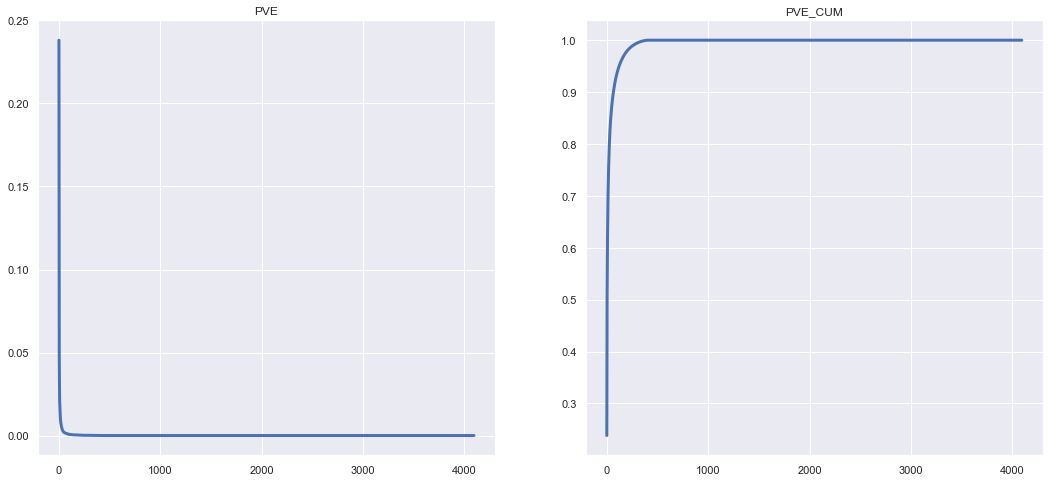

In [181]:
def pve(evl):
      return np.array(evl / np.sum(evl))
axis = plt.subplots(nrows=1, ncols=2, figsize=(18,8))[1]
plt.title("PVE")
p1 =sbn.lineplot(data=pve(eig_vals), estimator=None, lw=3,ax=axis[0],  markers=True)
p2 = sbn.lineplot(data=pve(eig_vals).cumsum(), estimator=None, lw=3, ax=axis[1])
p1.set_title("PVE")
p2.set_title("PVE_CUM")

(10) Wir untersuchen nun die Hauptkomponenten der PCA.

* Visualisieren Sie das erste Eigengesicht (*eigenface*). Dies entspricht der 1. PCA-Komponente, also dem Eigenvektor der Kovarianzmatrix, der dem größten Eigenwert zugeordnet ist. Dieser Eigenvektor wird auch als "erster Eigenvektor" bezeichnet.

* Visualisieren Sie ebenfalls die Eigengesichter 2 bis 5.

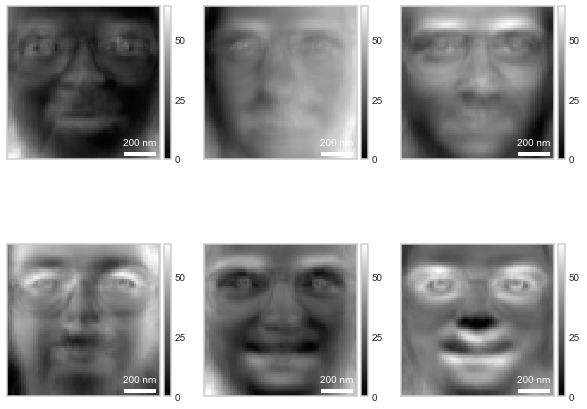

In [133]:
axs = plt.subplots(nrows=2, ncols=3, figsize= (10,8))[1]
for i in range(6):
      j = int(i/3)
      i %= 3
      # cast to real because of complex numbers with name
      # rescale_intensity to convert the image to positive range. this because  is necessary
      # to avoid "Correction methods work correctly only on images with non-negative values"
      isbn.imgplot(data=rescale_intensity(eig_ves[:, ((3*j) + i)].reshape(64, 64), out_range=(0,64)) , ax=axs[j][i], origin='upper', gray=True,
                   map_func=adjust_gamma, gamma= 1.0, dx=15, units='nm', alpha= 0.99)

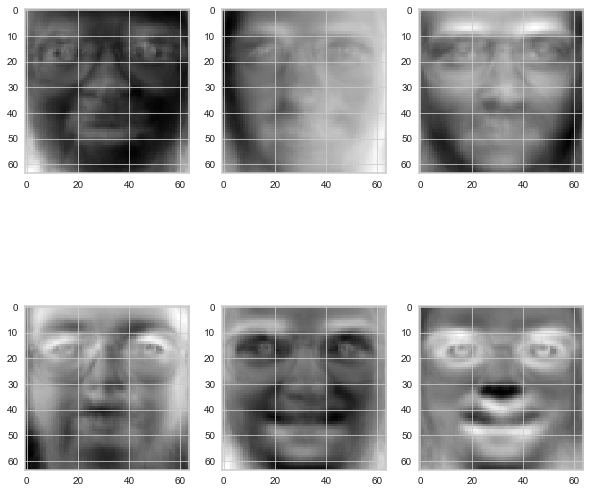

In [87]:
# 2x3 using matplotlib
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    # eigenfaces
    # cast to real because of complex numbers with name
    plt.imshow(np.real(eig_ves[:, i].reshape(64, 64)) , cmap='gray', origin="upper")
plt.show()

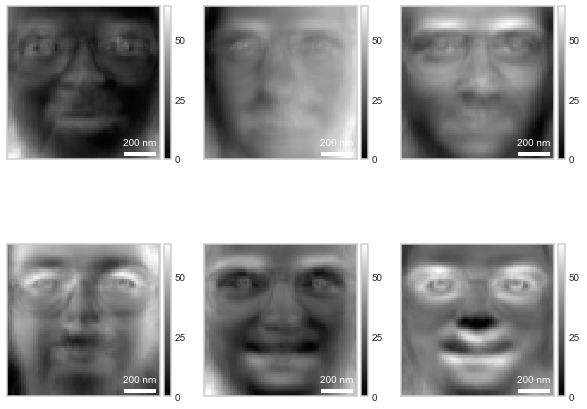

In [134]:
# using seaborn_image
axs = plt.subplots(nrows=2, ncols=3, figsize= (10,8))[1]
for i in range(6):
      j = int(i/3)
      i %= 3
      # cast to real because of complex numbers with name
      # rescale_intensity to convert the image to positive range. this because  is necessary
      # to avoid Correction methods work correctly only on images with non-negative values
      isbn.imgplot(data=rescale_intensity(np.real(eig_ves)[:, ((3*j) + i)].reshape(64, 64), out_range=(0,64)) , ax=axs[j][i], origin='upper', gray=True,
                   map_func=adjust_gamma, gamma= 1.0, dx=15, units='nm', alpha= 0.99)

(11) Die PCA-Komponenten (Eigengesichter) stellen eine Basis dar, mit der sich die Gesichter im Olivetti-Datensatz darstellen lassen. Ihre Erkenntnisse aus Teilaufgabe (9) deuten darauf hin, dass zur Darstellung der Gesichter nicht alle Basisvektoren notwendig sein werden. Dies werden Sie hier untersuchen.

Seien $\vec{f}_1, \ldots, \vec{f}_k$ die PCA-Komponenten der $k$-größten Eigenwerte, und bezeichne $\vec{g}$ der Vektor, der das Gesicht 296 (0-basierte Zählung) darstellt. Projizieren Sie das Gesicht $\vec{g}$ auf die ersten 25 PCA-Komponenten (Eigengesichter). Sie erhalten dadurch 25 Koeffizienten $c_i$,

$$c_i = \vec{f}_i^\text{T}(\vec{g}-\vec{m}),$$

wobei $\vec{m}$ der Vektor der Mittelwerte über die Merkmale des gesamten Datensatzes ist. Denn: Vergessen Sie nicht, dass Sie Ihre Daten *vor* der Projektion zentrieren müssen (schlagen Sie die entsprechende Folie in der Vorlesung nach). Dies bedeutet, dass Sie von den Merkmalen (Pixeln) des Gesichts 296 jeweils die Mittelwerte (ermittelt über den ganzen Datensatz) abziehen müssen.
  
Bemerkung:

* Sie haben hier das Gesicht 296 mithilfe von 25 Koeffizienten beschrieben und damit mit einem Vektor in einem 25-dimensionalen Raum. Dieser Raum ist deutlich kleiner als der ursprüngliche Raum (Dimensionsreduktion!). 


In [127]:
"""
# dat: data
# fn: face number
# nc: number of components
"""
def reconstruct(dat, fn, nc):
    mean = np.mean(dat, axis=0)
    # cd: centralized data
    cd = dat - mean
    evc = eig_ves[:, :nc]
    cfs = evc.T @ cd[fn-1, :]
    return evc @ cfs + mean

(12) Sie haben aus Teilaufgabe (11) 25 Koffizienten vorliegen, mit denen Sie - mithilfe der Eigengesichter - nun das Gesicht rekonstruieren werden. Rekonstruieren Sie das Gesicht aus den 25 Koeffizienten mithilfe der Eigengesichter,

$$\vec{g}^\prime = \left(\sum\limits_{i=1}^k c_i \vec{f}_k\right) + \vec{m},$$

wobei Sie auch hier sich daran erinnern, dass Sie für die Rekonstruktion nun den Mittelwertsvektor $\vec{m}$, den Sie in Teilschritt (11) abgezogen hatten, wieder aufaddieren müssen.

* Visualisieren Sie in einem Plot das ursprüngliche Gesicht (links) sowie das rekonstruierte Gesicht (rechts).

No. of Obs. : 4096
Min. Value : 0.14049586653709412
Max. Value : 0.7851239442825317
Mean : 0.5198863744735718
Variance : 0.017052635550498962
Skewness : -0.45137323403979573


<AxesSubplot:>

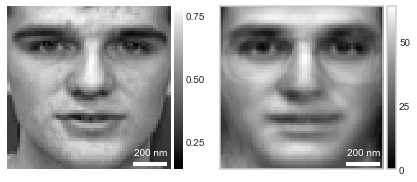

In [128]:
axs = plt.subplots(nrows=1, ncols=2, figsize =(7,3))[1]
isbn.imgplot(data=data[295].reshape(64,64), gray=True,origin='upper', describe=True, despine=True, ax=axs[0],
                   map_func=adjust_gamma, gamma= 1.0, dx=15, units='nm', alpha= 0.99)
isbn.imgplot(data=rescale_intensity(reconstruct(data,296,25).reshape(64, 64), out_range=(0,64)), ax=axs[1], origin='upper', gray=True,
                   map_func=adjust_gamma, gamma= 1.0, dx=15, units='nm', alpha= 0.99)

(13) Experimentieren Sie mit einer größeren Anzahl von PCA-Komponenten und untersuchen Sie, wie sich die Projektion und die Rekonstruktion verbessert, wenn Sie die ersten 100 oder 200 PCA-Komponenten benutzen.

* Was beobachten Sie, wenn Sie die Anzahl der PCA-Komponenten erhöhen? (1-2 Sätze)

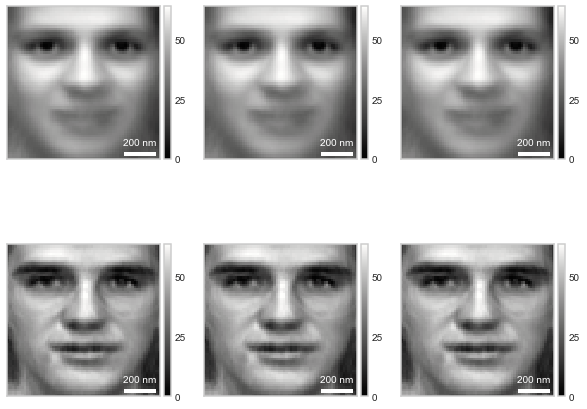

In [135]:
# lco: list of coefficients
ncs = [1, 5, 25, 50, 100, 200]
# using seaborn_image
axs = plt.subplots(nrows=2, ncols=3, figsize= (10,8))[1]
for i in range(len(ncs)):
   j = int(i/3)
   i %= 3
   # cast to real because of complex numbers with name
   # rescale_intensity to convert the image to positive range. this because  is necessary
   # to avoid Correction methods work correctly only on images with non-negative values
   isbn.imgplot(data=rescale_intensity(np.real(reconstruct(data,296,ncs[3*j + 1])).reshape(64, 64), out_range=(0,64)) , ax=axs[j][i], origin='upper', gray=True,
               map_func=adjust_gamma, gamma= 1.0, dx=15, units='nm', alpha= 0.99)

(14) Nehmen Sie an, wir würden PCA als Bildkompressionsmethode einsetzen. Überdenken Sie folgendes Gedankenexperiment: Wir projizieren jedes Gesicht auf die 200 größten PCA-Komponenten (Eigengesichter) und erhalten jeweils 200 Koeffizienten pro Gesicht. Wir speichern nun diese Koeffizienten sowie die 200 PCA-Komponentenvektoren in einer Datei ab.

* Wie groß (in Megabytes) ist der Originaldatensatz, wenn wir zur Speicherung jedes Pixels 8 Bytes nutzen?
* Wie groß (in Megabytes) wäre der projizierte Datensatz, der lediglich die 200 Eigengesichter, die 200 Koeffizienten pro Gesicht sowie den Mittelwertsvektor ($\vec{m}$) enthält? Wir nehmen auch in diesem Fall an, dass jedes Pixel und jeder Koeffizient 8 Bytes belegt.

(15) \[Optional\] Nutzen Sie [ipython Widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html), um eine interaktive Visualisierung der Gesichter des Datensatzes sowie ihrer Rekonstruktion zu erstellen: Legen Sie zwei Slider an: Mit dem ersten Slider können sie die Nummer des zu visualisierenden Gesichtes im Datensatz einstellen. Mit dem zweiten Slider können Sie die Anzahl der PCA-Komponenten für die Projektion und anschließende Rekonstruktion einstellen. Das Widget soll das ursprüngliche Gesicht sowie das rekonstruierte Gesicht darstellen.

### 6.2 Kriminalitätsraten (EDA mithilfe der PCA)

In dieser Übung werden wir einen klassischen Datensatz untersuchen, der aus den USA stammt. Es handelt sich um eine Zusammenstellung der Kriminalitätsraten in verschiedenen Staaten der USA sowie um den Prozentsatz der Bevölkerung, der in urbanen Regionen lebt (*UrbanProp*) aus dem Jahr 1975. Bei den Kriminalitätsraten interessieren uns Morde (*murder*), Körperverletzungen (*assault*) sowie Vergewaltigungen (*rape*) pro 100000 Einwohner, aufgeschlüsselt nach US-Staaten. Der Datensatz stammt aus dem *World Almanac and Book of facts 1975* (Kriminalitätsraten) und den *Statistical Abstracts of the United States 1975* (Urbane Regionen).

**Ihre Daten**

* Sie finden den Datensatz, den Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/USArrests.csv).

**Ihre Aufgaben**

(1) Importieren Sie den Datensatz und verschaffen Sie sich einen Überblick darüber, welche Merkmale (Features) Ihr Datensatz aufweist.

In [2]:
us_arrest = pd.read_csv('USArrests.csv')
us_arrest.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


(2) Führen Sie eine explorative Analyse durch (mit Mitteln der deskriptiven Statistik, Visualisierung und Werkzeugen zur Ermittlung von Zusammenhängen (Korrelationen)). Schreiben Sie (1-3 Sätze) Ihre Befunde auf.

In [3]:
us_arrest.rename(columns={'Unnamed: 0': 'State'}, inplace= True)
us_arrest.tail()

,State,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


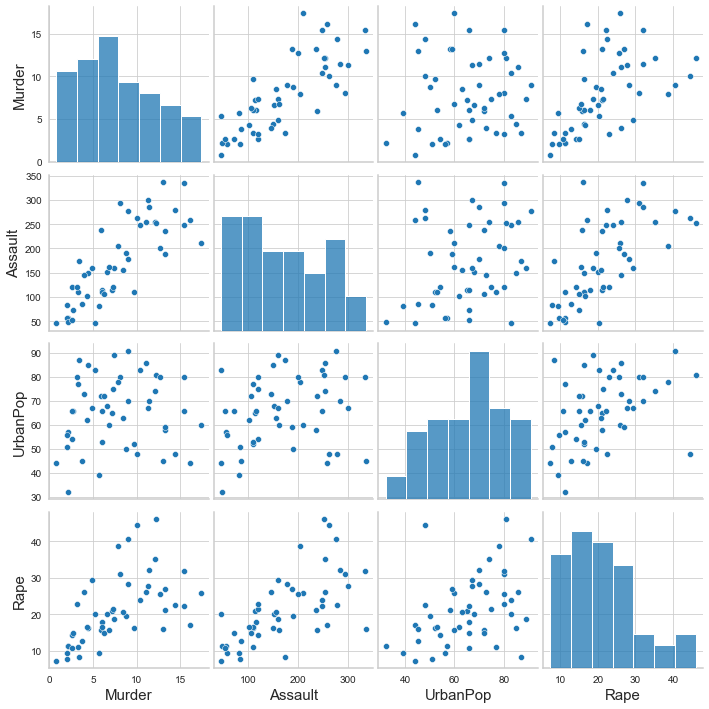

In [4]:
sbn.pairplot(data=us_arrest,diag_kind='hist')

In [7]:
# Pearson correlation
us_arrest.corr(method='pearson')

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


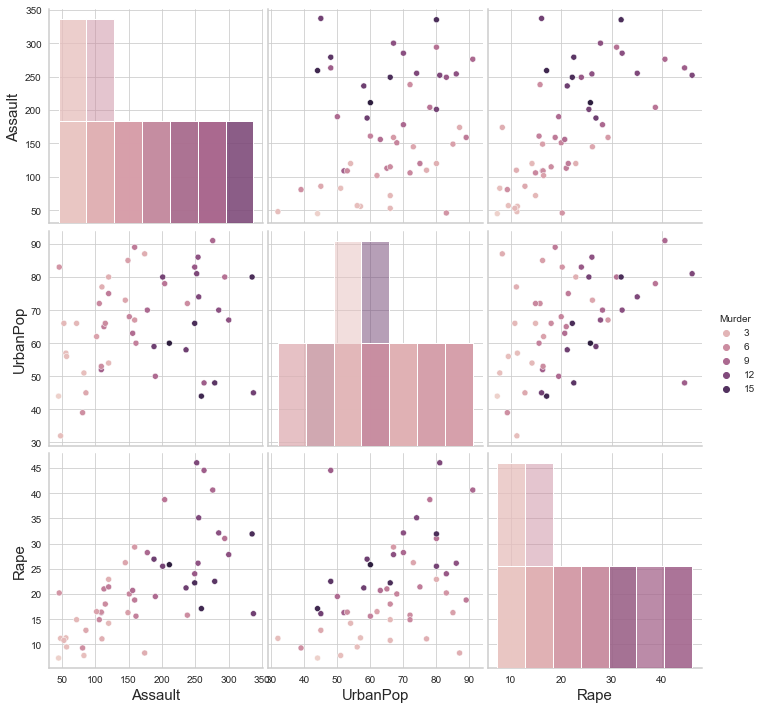

In [10]:
sbn.pairplot(data=us_arrest,diag_kind='hist', hue='Murder', height=us_arrest['State'].size/15)

In [176]:
# spearsmans correlation
us_arrest.corr(method='spearman')

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.817274,0.106716,0.679427
Assault,0.817274,1.000000,0.275213,0.714368
UrbanPop,0.106716,0.275213,1.000000,0.438107
Rape,0.679427,0.714368,0.438107,1.000000


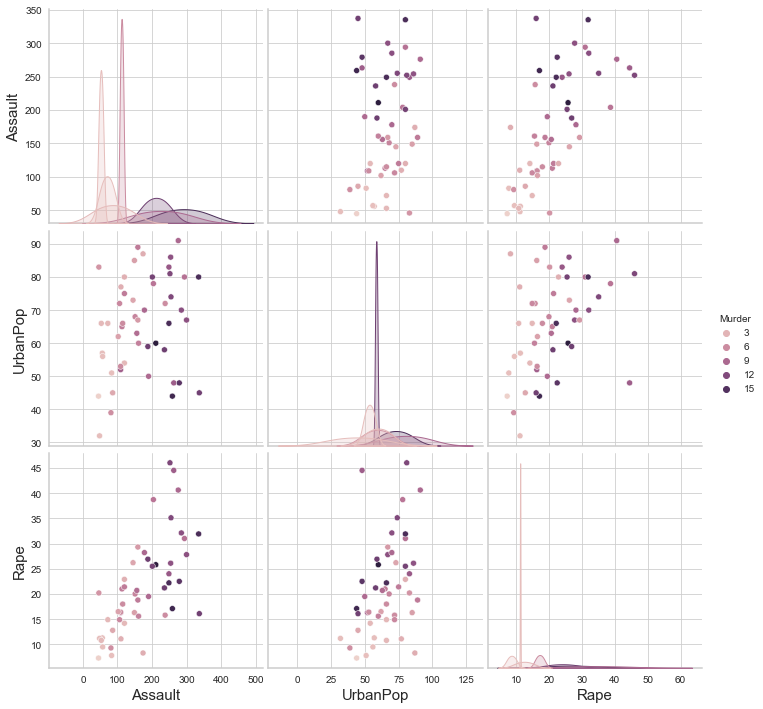

In [12]:
sbn.pairplot(data=us_arrest,diag_kind='auto', hue='Murder', height=us_arrest['State'].size/15)

(3) Ermitteln Sie die Varianz der Merkmale. Welche Unterschiede stellen Sie fest? (1-2 Sätze).

In [13]:
us_arrest.var()

C:\Users\Montahaee\AppData\Local\Temp\ipykernel_17000\4180978993.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  us_arrest.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

(4) Wir bereiten uns jetzt für eine Dimensionsreduktion per PCA vor. Klären Sie für sich zunächst: In welchen Skalen wurden die Merkmale gemessen?

(5) Welche Vorbereitungsmaßnahme ergibt sich für Sie aus Punkt (4)? Bereiten Sie Ihre Daten entsprechend vor.
* ROT-13 kodierter Tipp: Fpunhra Fvr va qvr Ibeyrfhatfhagreyntra: Jvr fbyygra Fvr Vuer Qngra ibe rvare CPN genafsbezvrera?

In [16]:
# normalize valuable data/columns
# us_arrest_norm: uan
def cols(dat):
    return dat.columns[1:]

def norm(dat):
    return (dat[cols] - dat[cols].mean()) / dat[cols].std()
# uan = (us_arrest[cols] - us_arrest[cols].mean()) /us_arrest[cols].std()
uan = norm(us_arrest)
uan.insert(0, us_arrest.columns[0], us_arrest[us_arrest.columns[0]])
uan.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,1.242564,0.782839,-0.520907,-0.003416
1,Alaska,0.507862,1.106823,-1.211764,2.484203
2,Arizona,0.071633,1.478803,0.998980,1.042878
3,Arkansas,0.232349,0.230868,-1.073593,-0.184917
4,California,0.278268,1.262814,1.758923,2.067820


(6) Nutzen Sie Ihre Implementierung der PCA aus Aufgabe 6.1 und führen Sie die PCA durch. Ihr Produkt sind die Merkmale in den neuen PCA-Koordinaten.

In [17]:
# covariance matrix uan_cov_mat: ucm
ucm = np.cov(uan[cols], rowvar=False)

evas, eves = np.linalg.eigh(ucm)

idx = np.argsort(evas)[::-1]
print(idx)
evas = evas[idx]
eves = eves[:,idx]

[3 2 1 0]


(7) Implementieren Sie eine Funktion, die Ihnen die *Proportion of Variance Explained* (PVE) für ein gegebenes Merkmal berechnet. Schlagen Sie dazu in der Vorlesung nach, wie die PVE definiert ist.

In [21]:
# here you could the last pve function, but you have here a data frame,
# and also we want to improve the function to a specific pve for latter steps(9).
def specific_pve(ev, evs):
    return ev / np.sum(evs)

(8) Visualisieren Sie die PVE als Funktion der PCA-Komponente: Erstellen Sie einen Plot, der die PVE der ersten, zweiten, usw. Komponente der PCA anzeigt.

Text(0.5, 1.0, 'PVE_CUM')

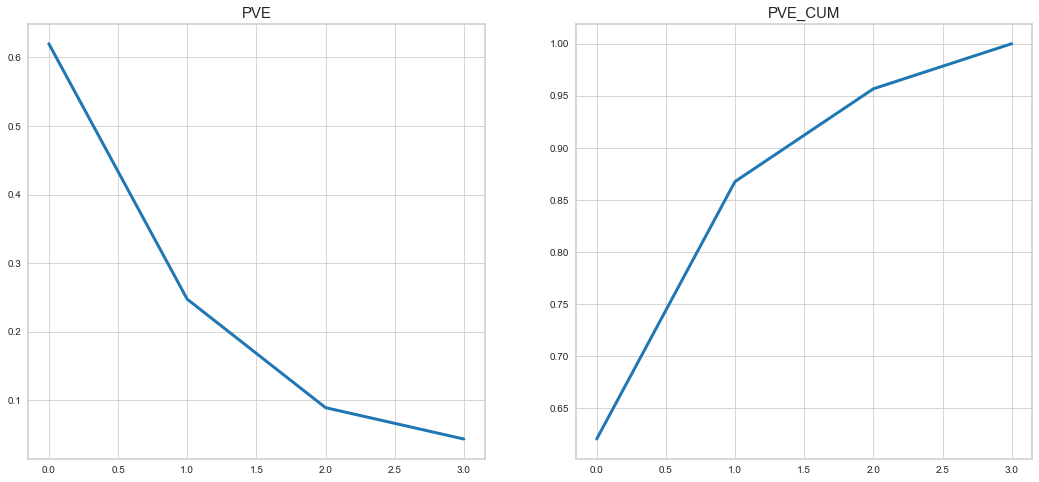

In [20]:
axis = plt.subplots(nrows=1, ncols=2, figsize=(18,8))[1]
plt.title("PVE")
p1 =sbn.lineplot(data=specific_pve(evas, evas), estimator=None, lw=3,ax=axis[0], markers=True)
p2 = sbn.lineplot(data=specific_pve(evas,evas).cumsum(), estimator=None, lw=3, ax=axis[1])
p1.set_title("PVE")
p2.set_title("PVE_CUM")

(9) Ermitteln Sie die Anzahl der ersten PCA-Komponenten, mit deren Hilfe Sie etwas mehr als 85% der Gesamtvarianz erklären können. Notieren Sie sich diese Zahl.

In [22]:
count = curr_sum = 0

for i in range(len(evas)):
    if curr_sum >= 0.85:
        break
    curr_sum += specific_pve(evas[i], evas)
    count += 1

print(count)

2


(10) Für die aus Schritt (9) ermittelte Anzahl an PCA Komponenten betrachten Sie nun die assoziierten Richtungsvektoren: Listen Sie die Komponenten der Richtungsvektoren in einer Tabelle (z.B. einem DataFrame), in der jede Spalte einen Richtungsvektor enthält und die Zeilen den Richtungsvektorkomponenten entsprechen. Beschriften Sie die Zeilen mit den Namen der Merkmale Ihres Datensatzes.

In [119]:
# pd.DataFrame(eves[:, :count].T, columns=us_arrest.columns[1:]).T
pca = pd.DataFrame(eves[:, :count].T, columns=cols(us_arrest)).T
# pca[1]
print(pca[1].values)

[ 0.41818087  0.1879856  -0.87280619 -0.16731864]


(11) Betrachten Sie nun Ihre Tabelle aus Schritt 10: Die Einträge der Richtungsvektoren entsprechen dem Gewicht, dem die PCA-Transformation dem entsprechenden Merkmal bei der Projektion auf die PCA-Richtung zuweist. Interpretieren Sie die Gewichte der 1. PCA Komponente: Welche Merkmale scheinen für die 1. PCA-Komponente wichtiger (bzw. gleich wichtig) zu sein, welche weniger wichtig? (1-3 Sätze)

(12) Interpretieren Sie die Gewichte der 2. PCA Komponente: Welche Merkmale scheinen für die 2. PCA-Komponente wichtiger (bzw. gleich wichtig) zu sein, welche weniger wichtig? (1-3 Sätze)

(13) In Anbetracht Ihrer Beobachtungen aus Schritten (11) und (12): Welche Eigenschaften fasst die 1. PCA Komponente zusammen, welche die 2. PCA-Komponente? Welche ungefähren Namen würden Sie den PCA-Komponenten geben?

(14) Visualisieren Sie die Daten in ihren in Schritt (9) ausgewählten PCA-Komponenten in einem Scatterplot. Beschriften Sie die Achsen mit den provisorischen Namen, die Sie ihnen in Schritt 13 gegeben haben.

In [ ]:
print(uan[cols].shape[1] == eves[:, :count].T.shape[1])
coefficients = eves[:, :count].T @ uan[cols].T
print(coefficients.shape)
# data projected : dp
dp = eves[:, :count] @ coefficients
sbn.set(rc={'figure.figsize':(10,8)})
s = sbn.scatterplot(x=coefficients.T[0], y=coefficients.T[1], cmap='viridis', hue_order=pca.index.values, hue_norm=pca.index,
                    c=coefficients.T.index, alpha=0.7, s= 200)
s.set_xlabel('PC1')
s.set_ylabel('PC2')
# s.set_figure(10*8)


c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\seaborn\relational.py:634: RuntimeWarning: invalid value encountered in sqrt
  kws.setdefault("linewidth", .08 * np.sqrt(np.percentile(s, 10)))
c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'PC2')

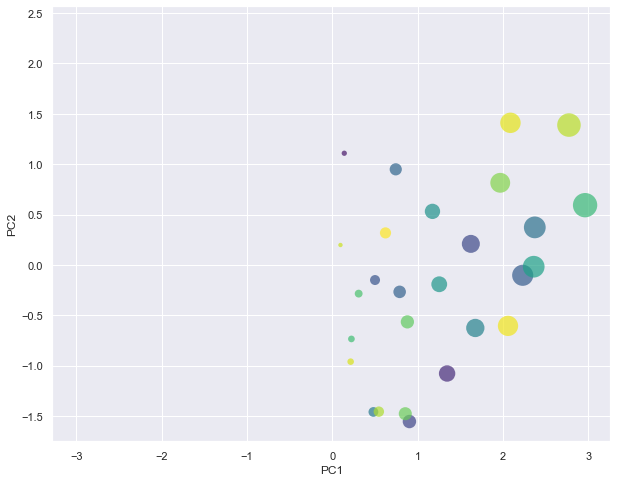

In [169]:
s = sbn.scatterplot(x=coefficients.T[0], y=coefficients.T[1], cmap='viridis', hue_order=pca.index.values, hue_norm=pca.index,
                    c=coefficients.T.index, s= coefficients[:1]*200, alpha=0.7)
s.set_xlabel('PC1')
s.set_ylabel('PC2')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

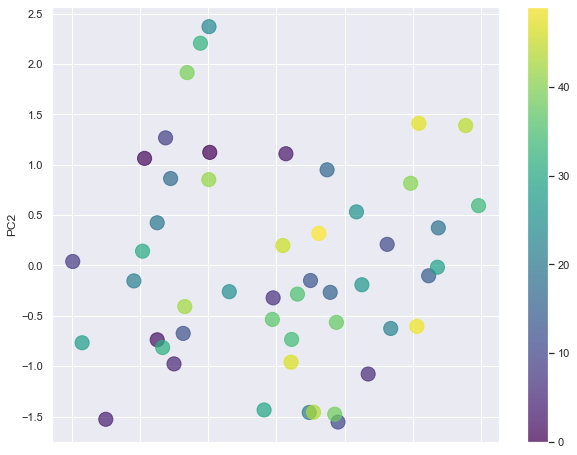

In [163]:
coefficients.T.plot.scatter(x=0, y=1,cmap='viridis', c=coefficients.T.index, figsize=(10,8), s= 200, alpha= 0.7, xlabel='PC1', ylabel='PC2')

c:\users\montahaee\appdata\local\programs\python\python38\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

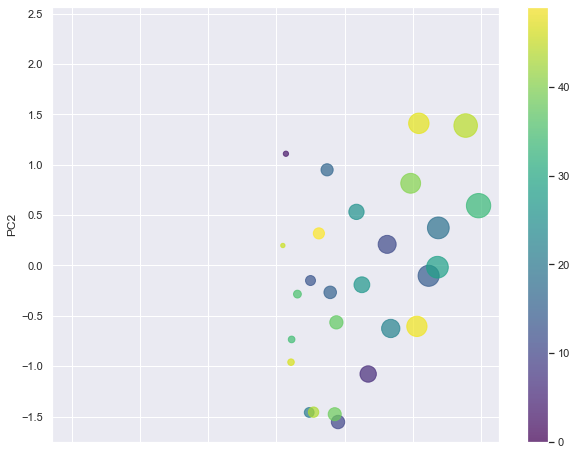

In [170]:
# size of scatter's radius according to PCA2

coefficients.T.plot.scatter(x=0, y=1,cmap='viridis', c=coefficients.T.index, figsize=(10,8), s= coefficients[:1]*200, alpha= 0.7, xlabel='PC1', ylabel='PC2')

### 6.3 z-scoring und PCA

In diesem Übungsteil werden wir uns noch einmal mit der PCA beschäftigen, allerdings dieses Mal auf konzeptioneller Ebene.

In der Vorlesung hatten wir die Kovarianzmatrix $S$ wie folgt definiert,

$$S = \frac{1}{N} \sum\limits_{n=1}^N (\mathbf{x}_n - \bar{\mathbf{x}}) (\mathbf{x}_n - \bar{\mathbf{x}})^T,$$

wobei $\mathbf{x}_n$ der Featurevektor des $n$-ten Datenpunktes und $\mathbf{\bar{x}}$ den Mittelwertsvektor über alle Datenpunkte bezeichnet.

**Ihre Aufgaben**

(1) Nutzen Sie die obige Definition von $S$ und berechnen Sie $S_{ij}$.

(2) Zeigen Sie, dass $S$ symmetrisch ist, also das $S^\text{T} = S$. Diese Eigenschaft hatten wir im Beweis der PCA in der Vorlesung genutzt.

(3) Wir verschieben nun den Mittelwert der $n$ Datenpunkte $\mathbf{x}_n$, in dem wir jeweils den Vektor $\mathbf{a} \neq \mathbf{0}$ auf alle Datenpunkte addiert, also: 
$$\tilde{\mathbf{x}}_n = \mathbf{x}_n + \mathbf{a}.$$
Bezeichne $S(\mathbf{x})$ die oben definierte Kovarianzmatrix und $S(\tilde{\mathbf{x}})$ die Kovarianzmatrix der transformierten Merkmale $\tilde{\mathbf{x}}_n$. Sind beide Matrizen unterschiedlich? Falls ja, warum? Falls nein, warum nicht?

(4) Welche Konsequenzen hat eine Verschiebung der Mittelwerte auf die Richtungen der PCA? Argumentieren Sie ausgehend von Ihren Beobachtungen in Schritt (3). (1-3 Sätze) 

(5) In der Vorlesung wurde empfohlen, die Daten vor einer PCA zu zentrieren, sodass alle Merkmale Mittelwert $0$ haben. Welche Konsequenzen hat dies für die Richtungen der PCA? Orientieren Sie sich an Ihrer Antwort in Schritt (4).

(6) Betrachten Sie zwei Szenarien: (a) Sie zentrieren Ihre Datenpunkte vor der Projektion auf die Richtungen der PCA. (b) Sie zentrieren Ihre Datenpunkte *nicht* vor der Projektion auf die Richtungen der PCA. Werden Sie in beiden Fällen dieselben PCA-Koordinaten Ihrer Datenpunkte erhalten? Falls ja, warum? Falls nein, warum nicht?

(7) Nehmen wir an, dass Sie Ihre Merkmale standardisieren (also ein z-scoring durchführen). Betrachten Sie nun die Kovarianzmatrix $S$, wie sie zu Beginn der Aufgabe definiert ist. Diese Matrix $S$ entspricht einer weiteren Matrix, die Sie bereits kennen. Um welche Matrix handelt es sich?